# Penn Electric Racing Data Analyzer: PERDA

Welcome to PERDA: PER custom python library for data processing needs.

Instructions:
- This is a template notebook to demonstrate PERDA.
- PERDA can be installed locally, or on google colab.
- Having access to PERDA github repo will give you access to the library
- Please follow instructions for online OR local installation.


## Colab Instructions:

We use github repo to install the library. Simply run the following code to install perda:

In [ ]:
# Run this cell for perda updates, and potential branch changes
ORG_NAME = "Penn-Electric-Racing"
REPO_NAME = "PER-Data-Analyzer"
BRANCH = "main"  # Branch Input

!pip uninstall -y perda #Avoid perda overlap incase of updates
!pip install git+https://github.com/{ORG_NAME}/{REPO_NAME}.git@{BRANCH}

You can mount PER google drive and access data files if you have access

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""path to folder --> Choose your path, personal or PER drive"""

# folder_path = '/content/drive/MyDrive/REV8/TESTING/REV8 Testing Data/'
folder_path = "/content/drive/Shareddrives/FSAE Penn Electric Racing/REV8/TESTING/REV8 Testing Data"

"""If using uploaded file, comment previous and uncomment next"""
# folder_path = 'relative/path/to/your/file'

In [ ]:
# run this cell if you need to see the available directories
os.listdir(folder_path)

In [ ]:
# Name of the log file
logfile = folder_path + "/10_08/01_01_00 12_18_59 AM.csv"
"""
if using personal drive
"""
# logfile = "/04_24/04_24_23 07_41_13 PM.csv"

## Local Instructions

PERDA can also be installed locally. You will need to clone the git repo locally.

- Open terminal, `cd` to the folder you want to put repo
- Run `git clone https://github.com/Penn-Electric-Racing/PER-Data-Analyzer.git`
- Make sure your python env is activated, then run `pip install .`
- Set your path for logfile

In [1]:
# logfile = "path/to/your/csv/file"
logfile = "./csv_files/[Practice Endurance] 05_25_23 09_39_05 PM.csv"  # example

## Code Demo

Import perda and create instance. You can create multiple perda instence for reading multiple csv at the same time.

In [2]:
from perda import Analyzer

aly = Analyzer()  # creating analyser object
aly2 = Analyzer()  # We can create multiple if we want to read serval files
aly3 = Analyzer()

Analyzer Created
Analyzer Created
Analyzer Created


Perda parse all data base on timestamp of one high frequency data \
If no input, default to highest frequency data

In [3]:
aly.read_csv(logfile)  # Parsing the csv file using path

Header: PER CSV Modbus Log 05/25/23 09:39:05 PM



Reading CSV: 17791117 lines [00:40, 439062.68 lines/s]
Creating DataInstances: 100%|██████████| 834/834 [00:41<00:00, 20.31it/s]

Csv parsing complete.


In [4]:
from perda import pretty_print_single_run_info

# Print all possible input can variables.
# By default sorted by name, can also sort by "id" for canid sort
# Good for copying down in text editor and find your stuff :)
pretty_print_single_run_info(aly.data)
# aly.print_variables(sort_by="id")  # Sort by CAN ID

Parser Info:
  Time range: 0.02 to 2186.257 (s)
  Total CAN IDs:   834
  Total CAN Names: 832
  Total Data Points: 17790282


In [5]:
from perda import pretty_print_single_run_variables

# We can also search for specific variables
pretty_print_single_run_variables(aly.data, "bat")
# We can also input multiple search, default we split by space and find union
pretty_print_single_run_variables(aly.data, "bat wheel")
# We can also do strict search
pretty_print_single_run_variables(aly.data, "bat wheel", strict_search=True)

Total CAN Variables matching ANY terms 'bat': 9
CAN Name                 CAN ID  Description
------------------------------------------
charger.faults.battery   8442  Battery Fault
pdu.faults.ocBat         8835  Battery overcurrent
pdu.faults.ocBat         8838  Battery overcurrent
pdu.faults.otBat         8831  Battery overtemperature
pdu.faults.ucBat         8836  Battery undercurrent
pdu.faults.utBat         8832  Battery undertemperature
pdu.sensors.batV         8922  Battery voltage
pdu.sensors.currentBAT   8892  Battery current
pdu.signals.chargingBat  8822  Charging from DCDC
------------------------------------------
Total CAN Variables matching ANY terms 'bat wheel': 19
CAN Name                                  CAN ID  Description
-----------------------------------------------------------
charger.faults.battery                    8442  Battery Fault
pcm.moc.motor.wheelSpeed                  8233  Linear Speed
pcm.param.backWheelSpeedGearTeethPerRev   8220  Back Wheel Speed Se

In [6]:
from perda import pretty_print_data_instance_info

# We can also get data information using function print_info
pretty_print_single_run_info(aly.data)

# print individual variable info
pretty_print_data_instance_info(aly.data["ams.pack.current"])

# can also use canid
pretty_print_data_instance_info(aly.data[8598])

Parser Info:
  Time range: 0.02 to 2186.257 (s)
  Total CAN IDs:   834
  Total CAN Names: 832
  Total Data Points: 17790282
DataInstance for | Current (ams.pack.current) | canid=8753
  Data points:      218602
  Time range:       0.0000 to  2186.2530 (s)
  Min value:       -9.6369 at   352.4340 (s)
  Max value:      168.2184 at   544.7460 (s)
  Integral:     42268.4245
  Average value:   19.3337
DataInstance for | Temperature (ams.stack.thermistors.temperature[38]) | canid=8598
  Data points:       10930
  Time range:       0.0000 to  2186.2200 (s)
  Min value:          -inf at   172.0120 (s)
  Max value:       49.1453 at  2072.2200 (s)
  Integral:           -inf
  Average value:      -inf


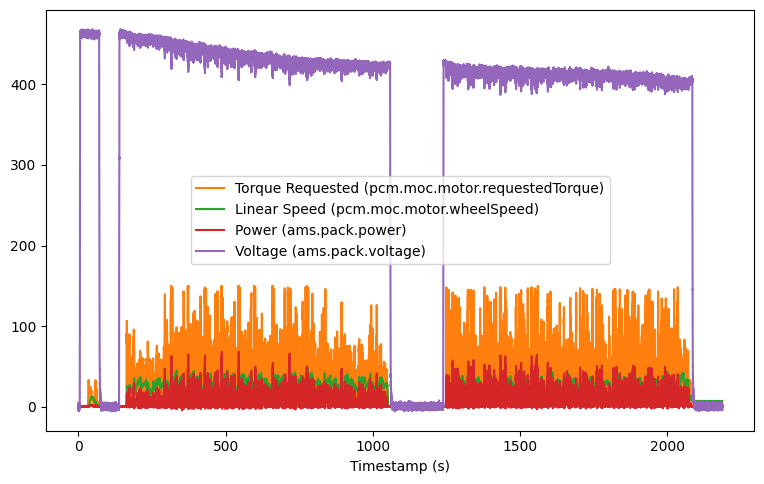

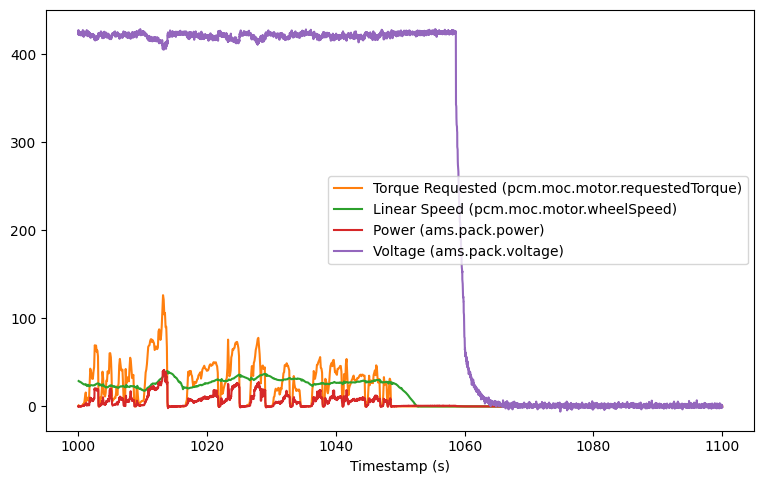

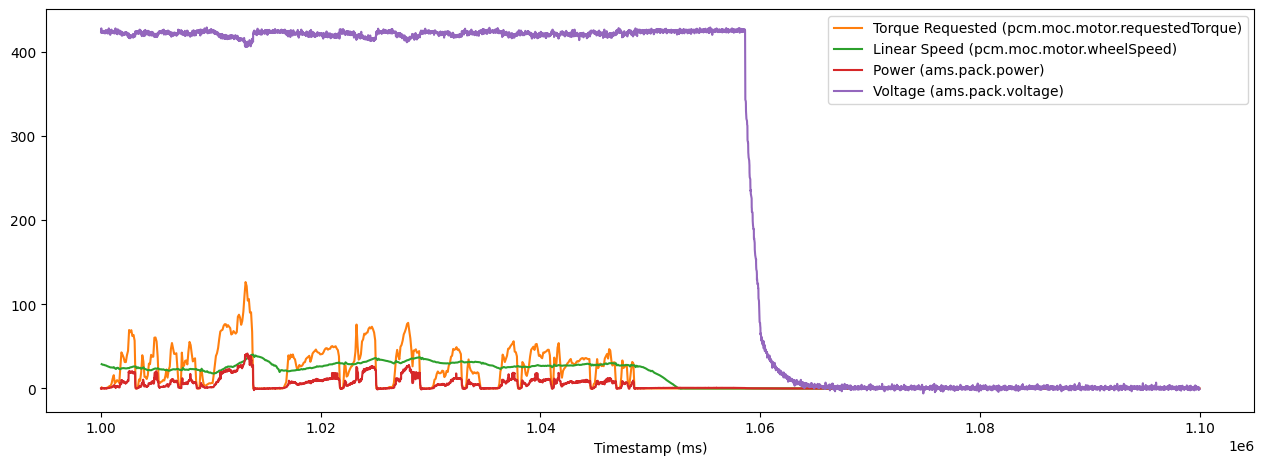

In [7]:
# Variables to graph
variables = [
    "pcm.moc.motor.requestedTorque",
    "pcm.moc.motor.wheelSpeed",
    "ams.pack.power",
    "ams.pack.voltage",
]
aly.plot(variables)

# Use start_time end_time to choose time range, default to seconds
aly.plot(variables, start_time=1000, end_time=1100)

# We can also use miliseconds, but we need to change start/end time to ms
# We can also change figsize
aly.plot(
    variables, start_time=1000000, end_time=1100000, time_unit="ms", figsize=(13, 5)
)

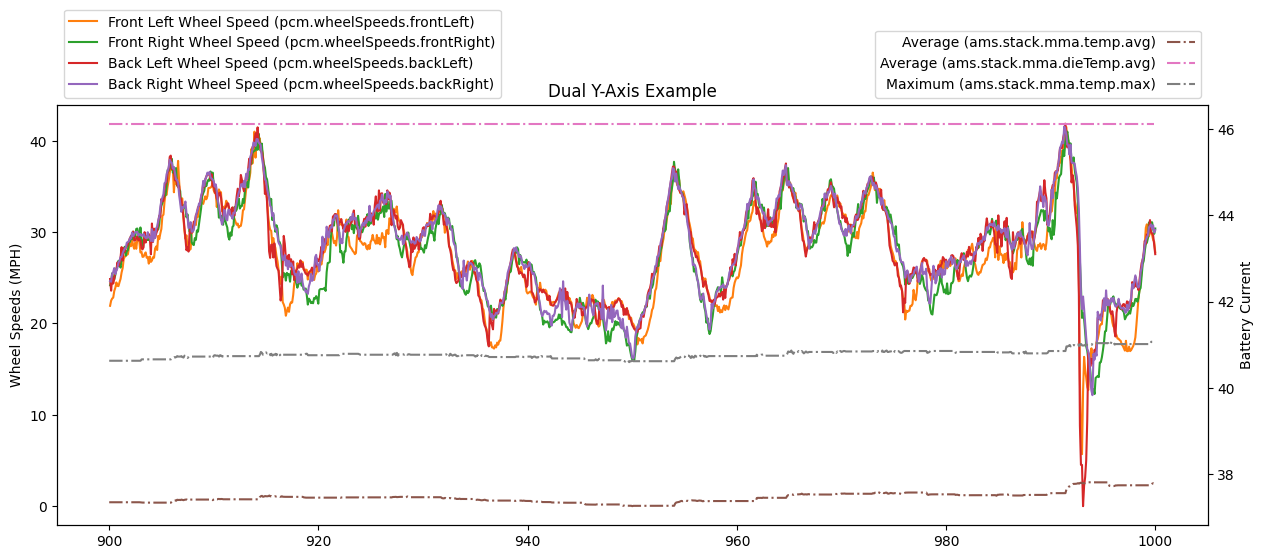

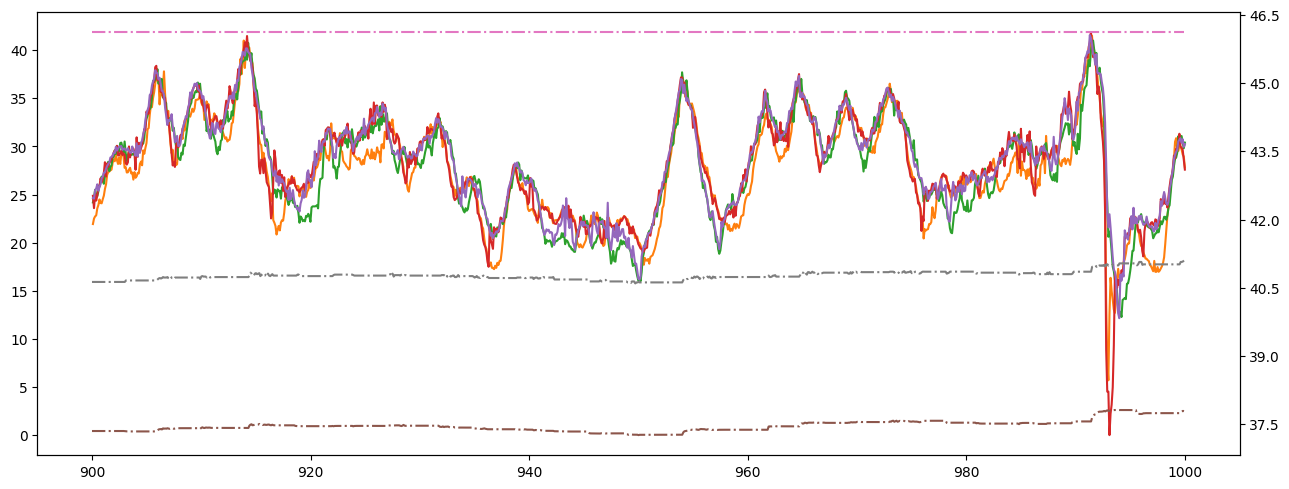

In [8]:
# Variables to graph
variables = [
    "pcm.wheelSpeeds.frontLeft",
    "pcm.wheelSpeeds.frontRight",
    "pcm.wheelSpeeds.backLeft",
    "pcm.wheelSpeeds.backRight",
]

variables_right = [
    "ams.stack.mma.temp.avg",
    "ams.stack.mma.dieTemp.avg",
    8772,  # canid also works
]

# We plot dual graph by putting another list after the first one. Second list is optional so otherwise just normal graph
# We can also add titles for all sides
aly.plot(
    variables,
    variables_right,
    start_time=900,
    end_time=1000,
    figsize=(13, 5),
    left_title="Wheel Speeds (MPH)",
    right_title="Battery Current",
    top_title="Dual Y-Axis Example",
)
# We can also turn labels off, and play around with spacing for both y-axis
aly.plot(
    variables,
    variables_right,
    start_time=900,
    end_time=1000,
    figsize=(13, 5),
    label=False,
    left_spacing=5,
    right_spacing=1.5,
)

### New feature: DataInstance
- DataInstance is what we have under the hood.
- All plotting/print_info/calculations/time_range_splits are using DataInstances

DataInstance for | Current (ams.pack.current) | canid=8753
  Data points:      218602
  Time range:       0.0000 to  2186.2530 (s)
  Min value:       -9.6369 at   352.4340 (s)
  Max value:      168.2184 at   544.7460 (s)
  Integral:     42268.4245
  Average value:   19.3337
DataInstance for | Current (ams.pack.current) | canid=8753
  Data points:      218602
  Time range:       0.0000 to  2186.2530 (s)
  Min value:        0.3631 at   352.4340 (s)
  Max value:      178.2184 at   544.7460 (s)
  Integral:     64130.9545
  Average value:   29.3337
DataInstance for | current + 10 | canid=8753
  Data points:      218602
  Time range:       0.0000 to  2186.2530 (s)
  Min value:        0.3631 at   352.4340 (s)
  Max value:      178.2184 at   544.7460 (s)
  Integral:     64130.9545
  Average value:   29.3337
DataInstance for | timestamp(s) - 1000 | canid=1
  Data points:     2000000
  Time range:       0.0000 to  1999.9990 (s)
  Min value:    -1000.0000 at     0.0000 (s)
  Max value:      999.9

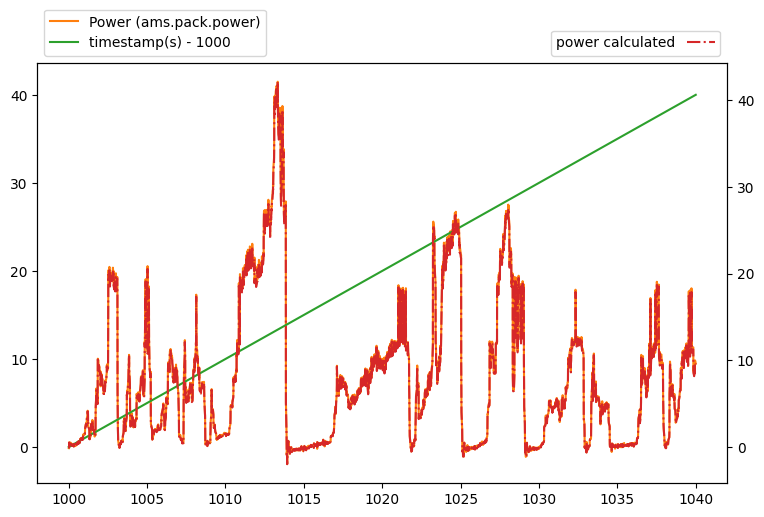

In [9]:
from perda import DataInstance
import numpy as np

# Key new feature: DataInstance
# .get_data() returns a DataInstance object
current = aly.data["ams.pack.current"]
voltage = aly.data["ams.pack.voltage"]

# Print info for current, actually aly.print_info("input") uses this under the hood
pretty_print_data_instance_info(current)

# We can do calculations :) no more annoying numpy array indexing stuff :)
current_plus = current + 10
pretty_print_data_instance_info(current_plus)

# We see that the new DataInstance has no label so we give it label, canid is -1 since it is not from csv
# Labels are important since they go onto the graph legends
current_plus.label = "current + 10"
pretty_print_data_instance_info(current_plus)

# Demo fro getting power from cur*vol
power_cal = (current * voltage) / 1000
power_cal.label = "power calculated"

# you can also create your DataInstance using two np array
# No need to import DataInstance if you are not creating your own
my_ts = np.arange(2000000)  # *Timestamp must be ms if we make our own*
my_val = my_ts / 1e3 - 1000
my_di = DataInstance(
    timestamp_np=my_ts, value_np=my_val, label="timestamp(s) - 1000", canid=1
)
pretty_print_data_instance_info(my_di)

v_l = [
    "ams.pack.power",
    my_di,
]

v_r = [power_cal]
aly.plot(v_l, v_r, start_time=1000, end_time=1040)

DataInstance for | sine wave :) | canid=1
  Data points:     2000000
  Time range:       0.0000 to  1999.9990 (s)
  Min value:       35.5000 at   940.9070 (s)
  Max value:       37.5000 at   205.1460 (s)
  Integral:     73000.3542
  Average value:   36.5002


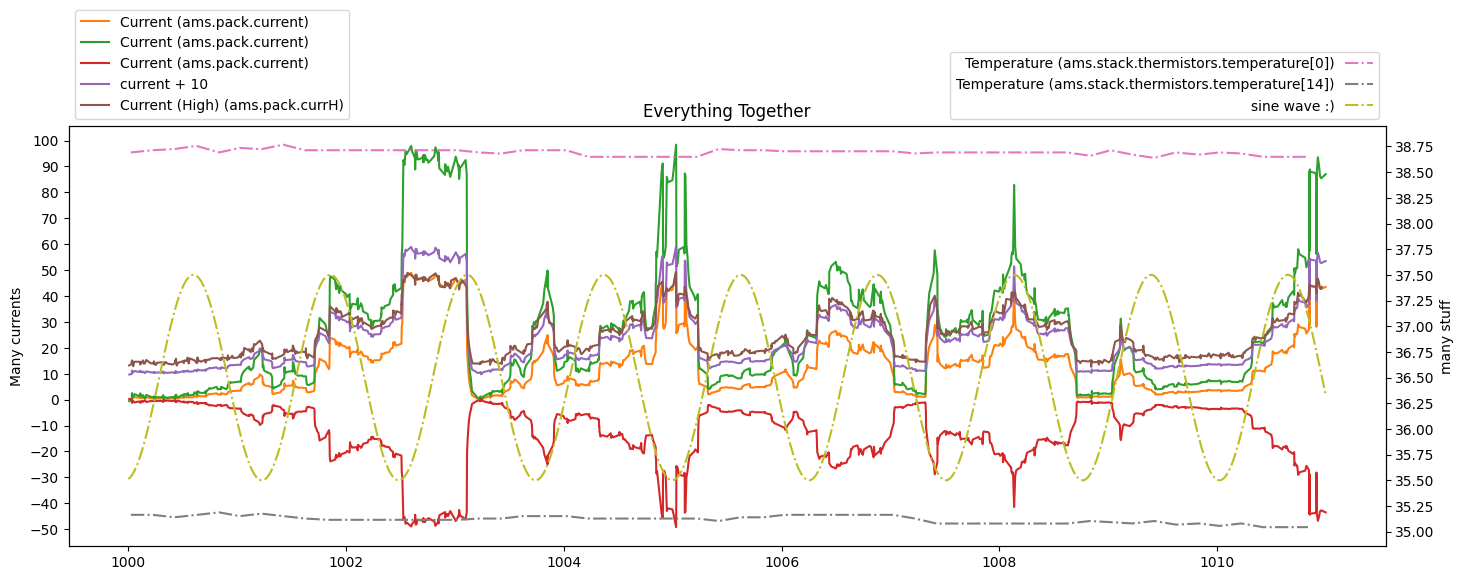

In [10]:
# Playground code to put everything together
current = aly.data["ams.pack.current"]

sin_ts = np.arange(2000000)
sin_val = np.sin(sin_ts / 200) + 36.5
sin_di = DataInstance(
    timestamp_np=sin_ts, value_np=sin_val, label="sine wave :)", canid=1
)
pretty_print_data_instance_info(sin_di)

v_l = [current, current * 2, -current, current_plus, "ams.pack.currH"]

v_r = [
    8567,
    "ams.stack.thermistors.temperature[14]",
    sin_di,
]
aly.plot(
    v_l,
    v_r,
    start_time=1000,
    end_time=1011,
    time_unit="s",
    figsize=(15, 5),
    left_spacing=10,
    right_spacing=0.25,
    left_title="Many currents",
    right_title="many stuff",
    top_title="Everything Together",
)